In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('Week8_Iris.csv')

In [31]:
print(df.shape)

(150, 6)


In [32]:
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [34]:
print(df.columns.tolist())

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [35]:
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [36]:
print(df.tail(5))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [37]:
np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [38]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [39]:
# Drop the ID column (not applicable here as there is no ID column)
df=df.drop('Id', axis=1)

In [40]:
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


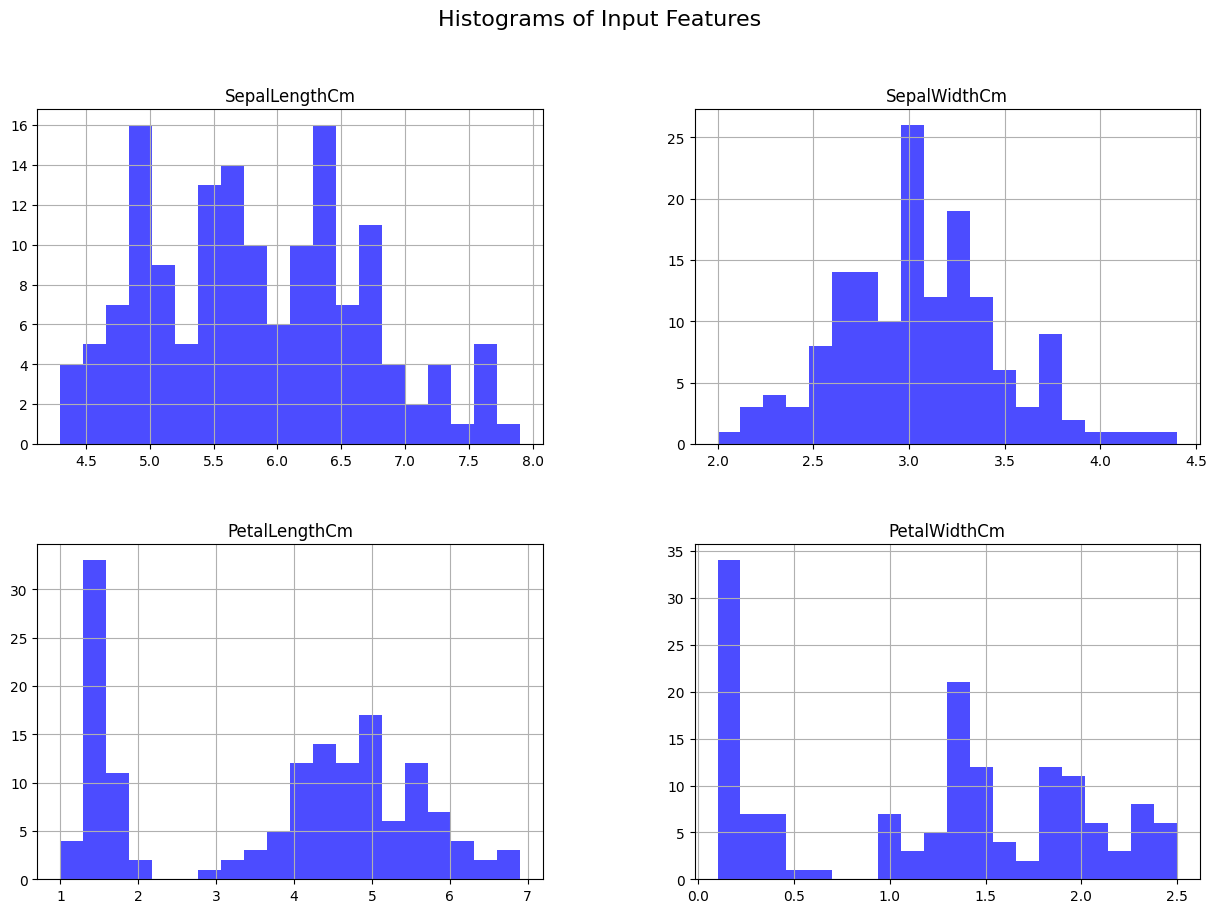

In [41]:
df.iloc[:, :-1].hist(bins=20, figsize=(15, 10), color='blue', alpha=0.7)
plt.suptitle('Histograms of Input Features', fontsize=16)
plt.show()

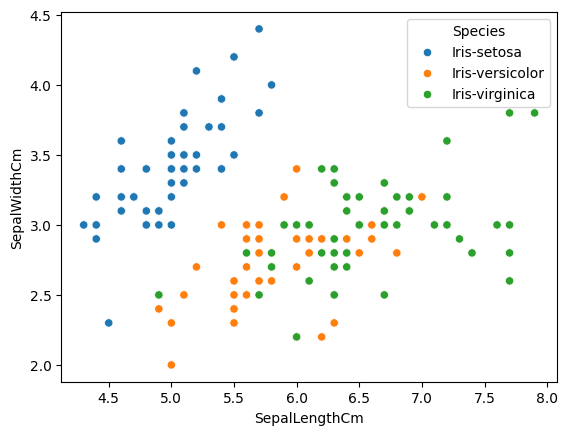

In [42]:
# Create scatter plot of 'sepal length' vs 'sepal width'
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species')
plt.show()

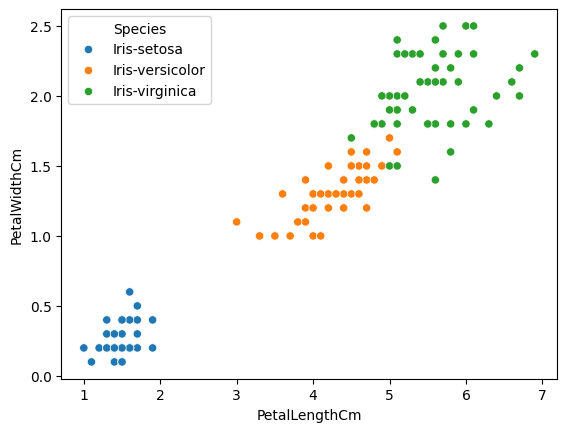

In [43]:
# Create scatter plot of 'petal length' vs 'petal width'
sns.scatterplot(data=df,x='PetalLengthCm',y='PetalWidthCm',hue='Species')
plt.show()

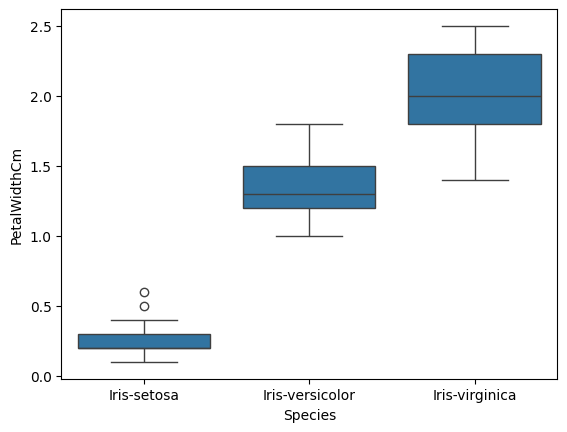

In [44]:
# Boxplot of petal width for different species
sns.boxplot(data=df,x='Species', y='PetalWidthCm')
plt.show()

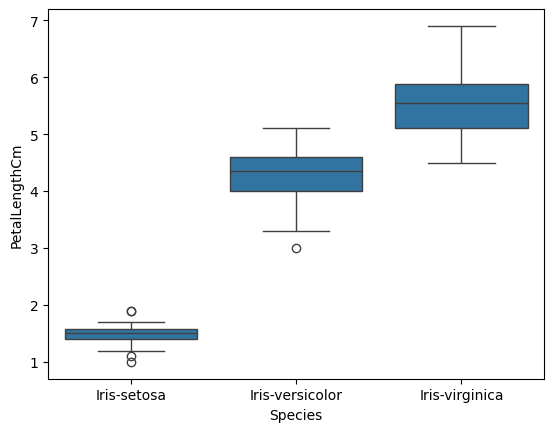

In [45]:
# Boxplot of petal length for different species
sns.boxplot(data=df,x='Species', y='PetalLengthCm')
plt.show()

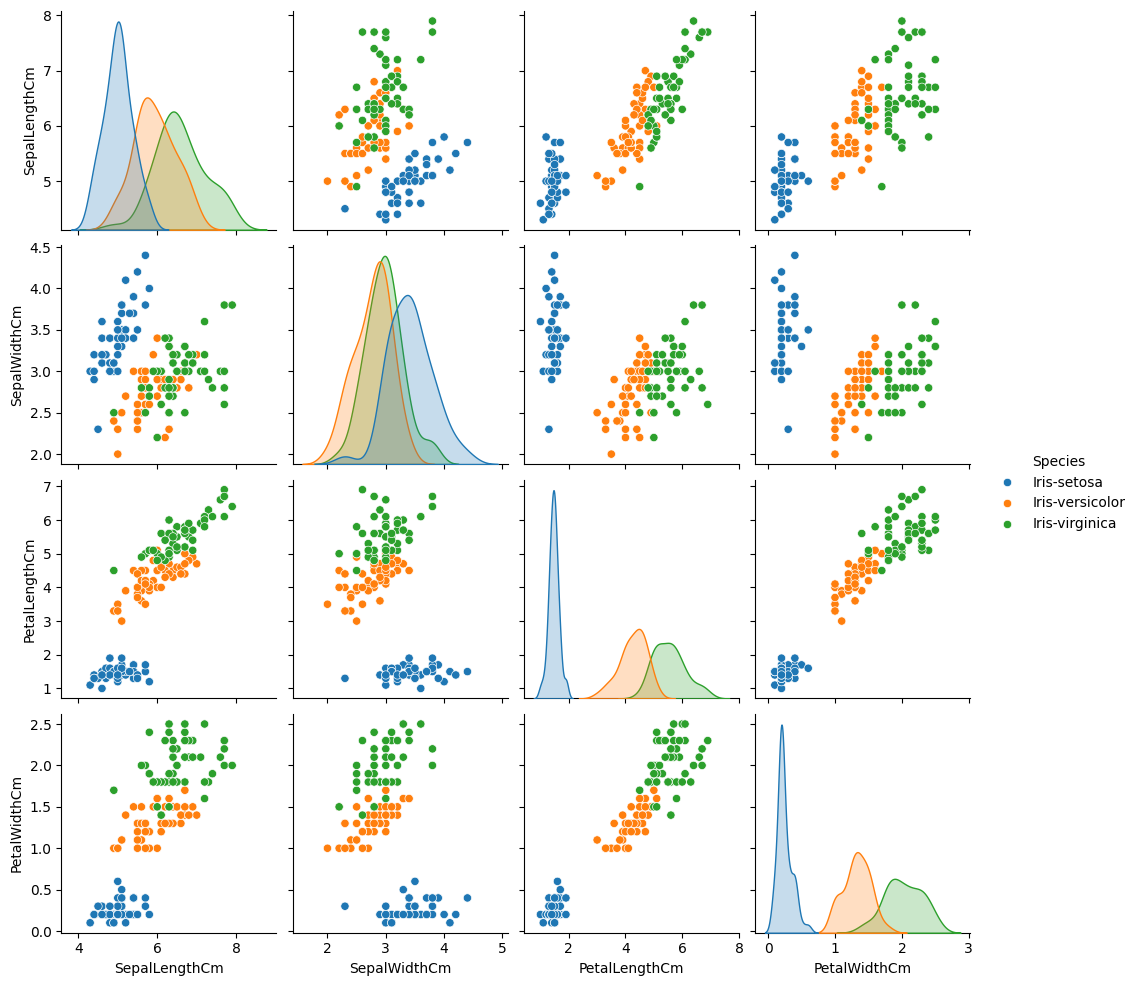

In [46]:
# Pairplot of all input features colored by species
import seaborn as sns

sns.pairplot(df, hue='Species')
plt.show()

In [48]:
x=df.drop('Species',axis=1)
y=df['Species']

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [53]:
from sklearn.svm import SVC
model = SVC(C=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)  

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

1.0


In [58]:
# K-fold cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, x, y, cv=5)
print("\nK-Fold Cross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


K-Fold Cross-Validation Scores:
[0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean CV Accuracy: 0.97


In [62]:
# Grid search CV to find optimal value of C
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Best C value: ", grid_search.best_estimator_.C)
# Train the best model on the entire dataset

Best parameters found:  {'C': 1}
Best cross-validation score:  0.95
Best C value:  1


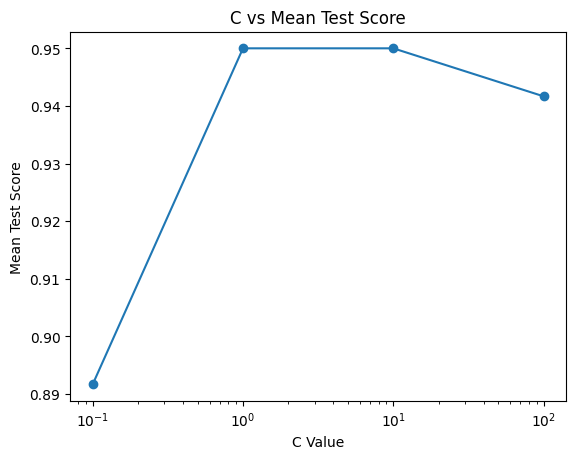

In [61]:
# Plot C vs train and test scores
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(results['param_C'], results['mean_test_score'], marker='o')
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Mean Test Score')
plt.title('C vs Mean Test Score')
plt.show()